In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv')

In [3]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [67]:
(df['yrs.service']==0).sum()

11

In [68]:
(df['yrs.since.phd']==0).sum()

0

In [4]:
df['rank'].value_counts()

Prof         266
AsstProf      67
AssocProf     64
Name: rank, dtype: int64

In [5]:
df['discipline'].value_counts()

B    216
A    181
Name: discipline, dtype: int64

In [69]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [6]:
df.isna().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [7]:
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le = LabelEncoder()
#oe = OrdinalEncoder(categories=[['AsstProf','AssocProf','Prof']])

In [10]:
df['discipline']=le.fit_transform(df['discipline'])
df['sex']=le.fit_transform(df['sex'])
df['rank']=le.fit_transform(df[['rank']])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [11]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18,1,139750
1,2,1,20,16,1,173200
2,1,1,4,3,1,79750
3,2,1,45,39,1,115000
4,2,1,40,41,1,141500
...,...,...,...,...,...,...
392,2,0,33,30,1,103106
393,2,0,31,19,1,150564
394,2,0,42,25,1,101738
395,2,0,25,15,1,95329


In [12]:
le.inverse_transform([1,0])

array(['AsstProf', 'AssocProf'], dtype=object)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

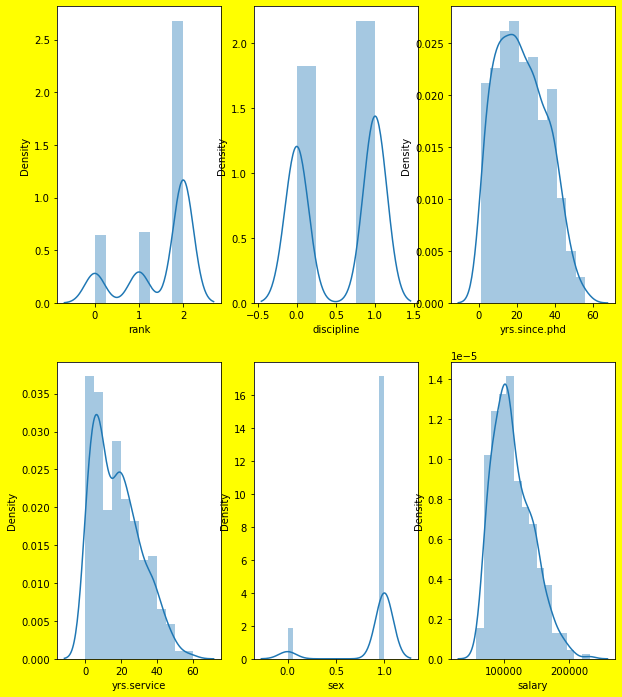

In [13]:
plotno=1
plt.figure(figsize=(10,12),facecolor='yellow')
for i in df:
    if plotno<=6:
        plt.subplot(2,3,plotno)
        sns.distplot(df[i])
        plt.xlabel(i)
        plotno+=1
plt.show()

In [14]:
df.skew()

rank            -1.151164
discipline      -0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
sex             -2.709958
salary           0.714568
dtype: float64

In [15]:
(df['yrs.service']==0).value_counts()

False    386
True      11
Name: yrs.service, dtype: int64

In [16]:
#it means it has 11 values for which service years are zero, so can't take log transformation for this. now either square root transformation or power transformation caan be done.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

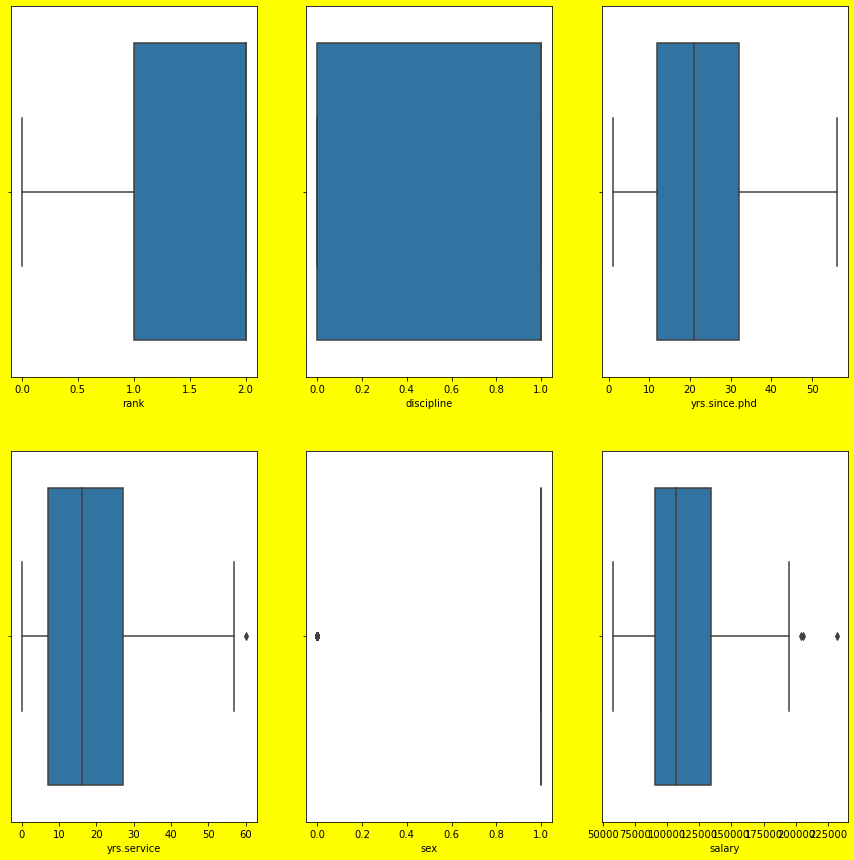

In [17]:
plotno=1
plt.figure(figsize=(15,15),facecolor='yellow')
for i in df:
    if plotno<=6:
        plt.subplot(2,3,plotno)
        sns.boxplot(df[i])
        plt.xlabel(i)
        plotno+=1
plt.show()

In [37]:
df.corr()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
rank,1.000000,-0.086266,0.525500,0.447499,0.132492,0.522207
discipline,-0.086266,1.000000,-0.218087,-0.164599,0.003724,0.156084
yrs.since.phd,0.525500,-0.218087,1.000000,0.909649,0.148788,0.419231
yrs.service,0.447499,-0.164599,0.909649,1.000000,0.153740,0.334745
sex,0.132492,0.003724,0.148788,0.153740,1.000000,0.138610
salary,0.522207,0.156084,0.419231,0.334745,0.138610,1.000000


<AxesSubplot:>

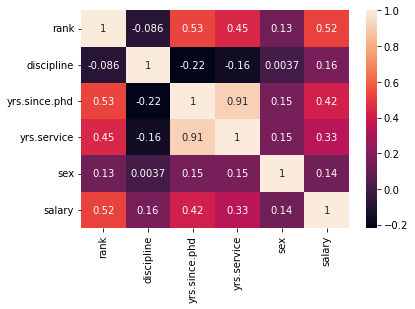

In [39]:
sns.heatmap(df.corr(),annot=True)

In [21]:
#it seems two features yrs.service and yrs_since.phd are correlated with each other. so, to avoid multicollinearity, one of the feature needs to be deleted. now, correlation value of yrs.service with salary = 0.33 which is less than correlation value of yrs.since_phd with salary = 0.42. hence, the feature yrs.service will be deleted. to cross verify multicollinearity, let's check VIF value. after that, the feature yrs.service will be deletd.


In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [36]:
#x=df.drop('salary',axis=1)
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['features']=x.columns
vif

,vif,features
0,1.727560,rank
1,1.063161,discipline
2,6.827995,yrs.since.phd
3,5.839120,yrs.service
4,1.028217,sex


In [24]:
from sklearn.preprocessing import PowerTransformer

In [25]:
pow = PowerTransformer(method = 'yeo-johnson')

In [26]:
df_features=df.drop('salary',axis=1)

In [27]:
df_features = pow.fit_transform(df_features.values)

In [28]:
df_features

array([[ 0.69005113,  0.91540317, -0.12729454,  0.25061906,  0.3300584 ],
       [ 0.69005113,  0.91540317, -0.04917821,  0.10511199,  0.3300584 ],
       [-1.09153554,  0.91540317, -1.62812069, -1.28803213,  0.3300584 ],
       ...,
       [ 0.69005113, -1.09241483,  1.39552477,  0.69878852,  0.3300584 ],
       [ 0.69005113, -1.09241483,  0.32017198,  0.02856739,  0.3300584 ],
       [-1.09153554, -1.09241483, -1.13497737, -1.12348349,  0.3300584 ]])

In [29]:
pd.DataFrame(df_features).skew()

0   -0.830409
1   -0.177684
2   -0.132757
3   -0.122152
4   -2.709958
dtype: float64

In [30]:
x= df.drop('salary',axis=1)
x_new = pd.DataFrame(df_features, columns = x.columns)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

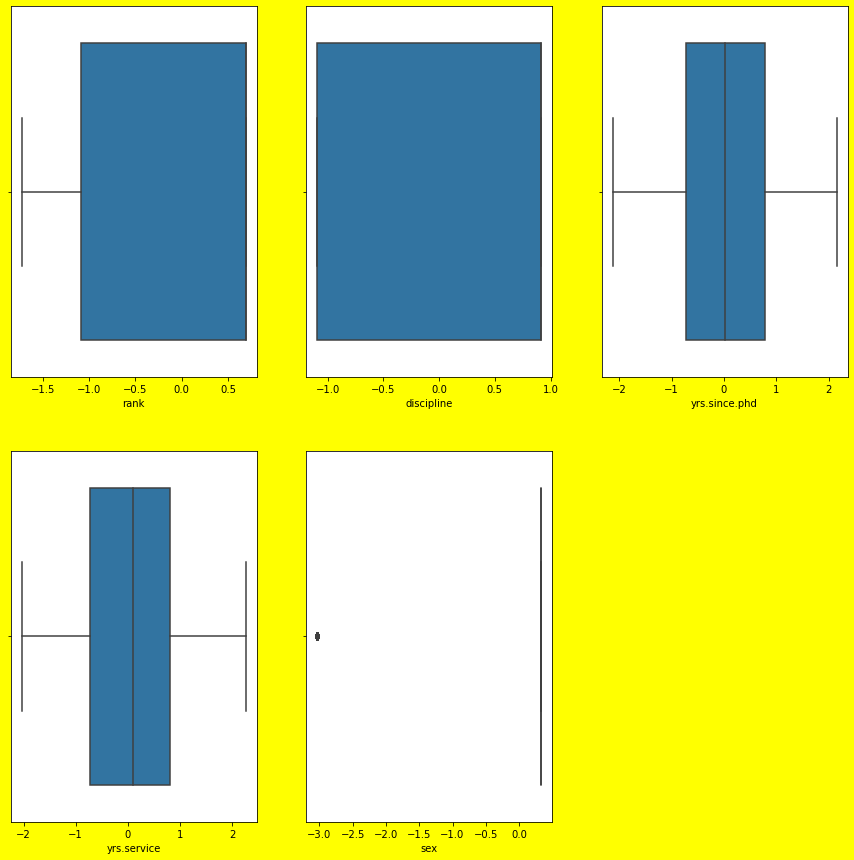

In [31]:
plotno=1
plt.figure(figsize=(15,15),facecolor='yellow')
for i in x_new:
    if plotno<=6:
        plt.subplot(2,3,plotno)
        sns.boxplot(x_new[i])
        plt.xlabel(i)
        plotno+=1
plt.show()

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [33]:
scaler=StandardScaler()
y=df['salary']
x_scaled = scaler.fit_transform(x_new)
y

0      139750
1      173200
2       79750
3      115000
4      141500
        ...  
392    103106
393    150564
394    101738
395     95329
396     81035
Name: salary, Length: 397, dtype: int64

In [77]:
x_new1=x_new.drop('yrs.service',axis=1)
x_scaled1 = scaler.fit_transform(x_new1)
#y_scaled = scaler.fit_transform(y)
x_new1

,rank,discipline,yrs.since.phd,sex
0,0.690051,0.915403,-0.127295,0.330058
1,0.690051,0.915403,-0.049178,0.330058
2,-1.091536,0.915403,-1.628121,0.330058
3,0.690051,0.915403,1.565162,0.330058
4,0.690051,0.915403,1.279680,0.330058
...,...,...,...,...
392,0.690051,-1.092415,0.854260,0.330058
393,0.690051,-1.092415,0.726155,0.330058
394,0.690051,-1.092415,1.395525,0.330058
395,0.690051,-1.092415,0.320172,0.330058


In [41]:
# as it is regresson problem, there are a lot of options we have. let's start with simpler Linear Regeression

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [43]:
lr=LinearRegression()

In [88]:
# to find best random_state
def algo_accuracy(x_scaled,y,algo,metric):
    max_acc=0
    max_i=0
    for i in range(0,100):
        x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=i)
        algo.fit(x_train,y_train)
        algo_pred=algo.predict(x_test)
        acc=metric(y_test,algo_pred)
        if acc > max_acc:
            max_acc=acc
            max_i = i
            i+=1
            print(f"model is {algo} accuracy is {max_acc} random_state is {max_i}")
        else:
            i+=1
            continue
    print(f"algo is {algo} maximum accuracy is {max_acc} at random_state {max_i}")

In [110]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [111]:
rfr=RandomForestRegressor()
gbr=GradientBoostingRegressor()
dtr =DecisionTreeRegressor()
knr = KNeighborsRegressor()

In [89]:
algo_accuracy(x_scaled1,y,lr,r2_score)

model is LinearRegression() accuracy is 0.4544049678920855 random_state is 0
model is LinearRegression() accuracy is 0.4738031723943452 random_state is 6
model is LinearRegression() accuracy is 0.4988865859529096 random_state is 7
model is LinearRegression() accuracy is 0.5162647125793137 random_state is 64
model is LinearRegression() accuracy is 0.5260152501047866 random_state is 79
model is LinearRegression() accuracy is 0.5407557236936091 random_state is 80
algo is LinearRegression() maximum accuracy is 0.5407557236936091 at random_state 80


In [90]:
algo_accuracy(x_scaled,y,dtr,r2_score)

model is DecisionTreeRegressor() accuracy is 0.012247502593195958 random_state is 2
model is DecisionTreeRegressor() accuracy is 0.05980856773472909 random_state is 4
model is DecisionTreeRegressor() accuracy is 0.0916655782580389 random_state is 5
model is DecisionTreeRegressor() accuracy is 0.1462764480908384 random_state is 6
model is DecisionTreeRegressor() accuracy is 0.2304501130580321 random_state is 11
model is DecisionTreeRegressor() accuracy is 0.29065359068768637 random_state is 16
model is DecisionTreeRegressor() accuracy is 0.2930906044570729 random_state is 42
model is DecisionTreeRegressor() accuracy is 0.4327297817129727 random_state is 61
model is DecisionTreeRegressor() accuracy is 0.43429073049515066 random_state is 99
algo is DecisionTreeRegressor() maximum accuracy is 0.43429073049515066 at random_state 99


In [91]:
algo_accuracy(x_scaled1,y,gbr,r2_score)

model is GradientBoostingRegressor() accuracy is 0.25346990669291825 random_state is 0
model is GradientBoostingRegressor() accuracy is 0.3973184100961449 random_state is 1
model is GradientBoostingRegressor() accuracy is 0.4258159955148415 random_state is 6
model is GradientBoostingRegressor() accuracy is 0.42884468276544363 random_state is 16
model is GradientBoostingRegressor() accuracy is 0.43144478351483107 random_state is 19
model is GradientBoostingRegressor() accuracy is 0.4966312186482279 random_state is 34
model is GradientBoostingRegressor() accuracy is 0.5387740366481468 random_state is 61
model is GradientBoostingRegressor() accuracy is 0.584049898893629 random_state is 63
algo is GradientBoostingRegressor() maximum accuracy is 0.584049898893629 at random_state 63


In [92]:
algo_accuracy(x_scaled,y,rfr,r2_score)

model is RandomForestRegressor() accuracy is 0.3617708331080821 random_state is 0
model is RandomForestRegressor() accuracy is 0.37984269700457796 random_state is 2
model is RandomForestRegressor() accuracy is 0.3838000958624167 random_state is 4
model is RandomForestRegressor() accuracy is 0.43336404985404453 random_state is 6
model is RandomForestRegressor() accuracy is 0.4934822349517174 random_state is 16
model is RandomForestRegressor() accuracy is 0.5691767848310607 random_state is 61
algo is RandomForestRegressor() maximum accuracy is 0.5691767848310607 at random_state 61


In [112]:
algo_accuracy(x_scaled,y,knr,r2_score)

model is KNeighborsRegressor() accuracy is 0.3914779098554637 random_state is 0
model is KNeighborsRegressor() accuracy is 0.42004190852492507 random_state is 4
model is KNeighborsRegressor() accuracy is 0.519692205720468 random_state is 6
model is KNeighborsRegressor() accuracy is 0.5385881946466402 random_state is 20
model is KNeighborsRegressor() accuracy is 0.5432520574613706 random_state is 61
model is KNeighborsRegressor() accuracy is 0.5927393350457985 random_state is 66
algo is KNeighborsRegressor() maximum accuracy is 0.5927393350457985 at random_state 66


In [101]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=63)
gbr.fit(x_train,y_train)
y_pred=gbr.predict(x_test)
r2_score(y_test,y_pred)

0.4754314780826778

In [113]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=66)
knr.fit(x_train,y_train)
y_pred=knr.predict(x_test)
r2_score(y_test,y_pred)

0.5927393350457985

In [96]:
from sklearn.model_selection import cross_val_score

In [94]:
cross_val_score(lr,x_scaled,y,scoring='r2',cv=7)

array([0.36677001, 0.44953259, 0.49443898, 0.40603946, 0.26234987,
       0.27402223, 0.34271225])

In [102]:
cross_val_score(gbr,x_scaled,y,scoring='r2',cv=7)

array([0.35304631, 0.30822211, 0.48657786, 0.35502798, 0.39608425,
       0.3300675 , 0.1849461 ])

In [114]:
cross_val_score(knr,x_scaled,y,scoring='r2',cv=7)

array([0.31395769, 0.25948853, 0.71090137, 0.25377812, 0.46865647,
       0.4116535 , 0.23989214])

In [97]:
from sklearn.linear_model import Lasso,LassoCV

In [98]:
lasscv = LassoCV(alphas=[0.001,0.01,0.1,1,10],max_iter = 100,normalize = True)

In [103]:
lasscv.fit(x_train,y_train)
alpha =lasscv.alpha_

In [104]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)
lasso_reg.score(x_test,y_test)

0.4541183055684137

In [105]:
#Hyperparameter Tuning

In [106]:
from sklearn.model_selection import GridSearchCV

In [107]:
params = {'max_depth':range(2,13,2),'min_samples_split':range(3,9,2)}
grid=GridSearchCV(gbr,param_grid=params)
grid.fit(x_train,y_train)
grid.best_params_

{'max_depth': 2, 'min_samples_split': 5}

In [108]:
gbr1 = GradientBoostingRegressor(max_depth=2,min_samples_split=5)
gbr1.fit(x_train,y_train)
gbr1.score(x_test,y_test)

0.42010343987324483

In [115]:
# Hyper Parameter Tuning for Kneighbors Regressor

In [116]:
params = {'n_neighbors':[5,7,9],'weights':['uniform','distance'],'leaf_size':range(1,8,1),'algorithm':['ball_tree','brute']}
grid=GridSearchCV(knr,param_grid=params)
grid.fit(x_train,y_train)
grid.best_params_

{'algorithm': 'ball_tree',
 'leaf_size': 2,
 'n_neighbors': 5,
 'weights': 'uniform'}

In [118]:
knr1 = KNeighborsRegressor(algorithm='ball_tree',leaf_size=2,n_neighbors=5,weights='uniform')
knr1.fit(x_train,y_train)
knr1.score(x_test,y_test)

0.5869455016575924